## 决策树过拟合问题

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data[:,0:2]
y = iris.target

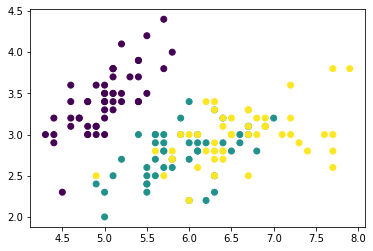

In [3]:
plt.scatter(x[:,0], x[:,1], c = y)
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x, y)

DecisionTreeClassifier()

In [5]:
def decision_boundary_plot(X, y, clf):
    axis_x1_min, axis_x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    axis_x2_min, axis_x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    x1, x2 = np.meshgrid( np.arange(axis_x1_min,axis_x1_max, 0.01) , np.arange(axis_x2_min,axis_x2_max, 0.01))
    z = clf.predict(np.c_[x1.ravel(),x2.ravel()])
    z = z.reshape(x1.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#F5B9EF','#BBFFBB','#F9F9CB'])

    plt.contourf(x1, x2, z, cmap=custom_cmap)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

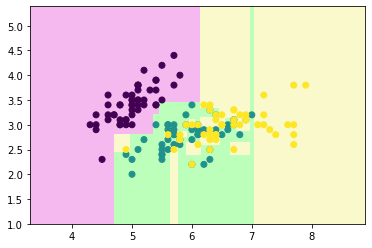

In [6]:
decision_boundary_plot(x,y,clf)

[Text(0.36890243902439024, 0.9615384615384616, 'X[0] <= 5.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.0975609756097561, 0.8846153846153846, 'X[1] <= 2.8\ngini = 0.237\nsamples = 52\nvalue = [45, 6, 1]'),
 Text(0.04878048780487805, 0.8076923076923077, 'X[0] <= 4.7\ngini = 0.449\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.024390243902439025, 0.7307692307692307, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.07317073170731707, 0.7307692307692307, 'X[0] <= 4.95\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.04878048780487805, 0.6538461538461539, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.024390243902439025, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.07317073170731707, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.0975609756097561, 0.6538461538461539, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.14634146341463414, 0.8076923076923077, 'X[0] <= 5.35\ngini = 0.

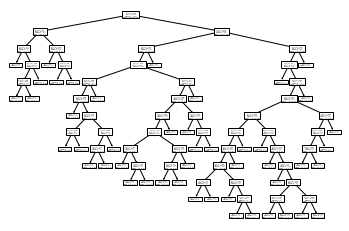

In [7]:
from sklearn.tree import plot_tree
plot_tree(clf)

## 决策树剪枝

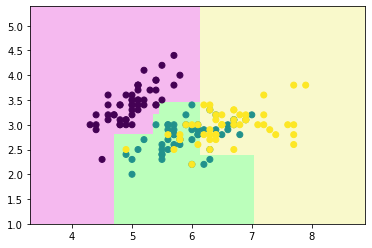

[Text(0.5, 0.9, 'X[0] <= 5.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2222222222222222, 0.7, 'X[1] <= 2.8\ngini = 0.237\nsamples = 52\nvalue = [45, 6, 1]'),
 Text(0.1111111111111111, 0.5, 'X[0] <= 4.7\ngini = 0.449\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.05555555555555555, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.16666666666666666, 0.3, 'X[0] <= 4.95\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 5.35\ngini = 0.043\nsamples = 45\nvalue = [44, 1, 0]'),
 Text(0.2777777777777778, 0.3, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.3888888888888889, 0.3, 'X[1] <= 3.2\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples

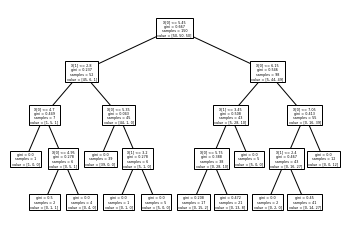

In [8]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x, y)
decision_boundary_plot(x, y, clf)
plot_tree(clf)

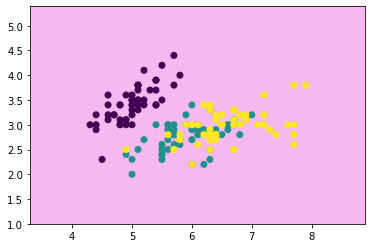

[Text(0.5, 0.5, 'gini = 0.667\nsamples = 150\nvalue = [50, 50, 50]')]

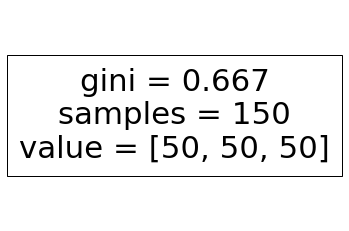

In [9]:
clf = DecisionTreeClassifier(min_samples_split=151)
clf.fit(x, y)
decision_boundary_plot(x, y, clf)
plot_tree(clf)

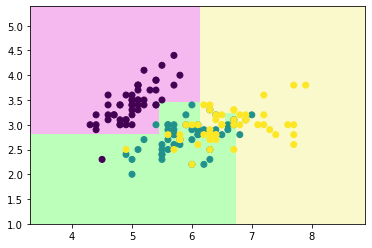

[Text(0.3684210526315789, 0.9375, 'X[0] <= 5.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.10526315789473684, 0.8125, 'X[1] <= 2.8\ngini = 0.237\nsamples = 52\nvalue = [45, 6, 1]'),
 Text(0.05263157894736842, 0.6875, 'gini = 0.449\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.15789473684210525, 0.6875, 'X[0] <= 5.35\ngini = 0.043\nsamples = 45\nvalue = [44, 1, 0]'),
 Text(0.10526315789473684, 0.5625, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.21052631578947367, 0.5625, 'gini = 0.278\nsamples = 6\nvalue = [5, 1, 0]'),
 Text(0.631578947368421, 0.8125, 'X[0] <= 6.15\ngini = 0.546\nsamples = 98\nvalue = [5, 44, 49]'),
 Text(0.3684210526315789, 0.6875, 'X[1] <= 3.45\ngini = 0.508\nsamples = 43\nvalue = [5, 28, 10]'),
 Text(0.3157894736842105, 0.5625, 'X[0] <= 5.75\ngini = 0.388\nsamples = 38\nvalue = [0, 28, 10]'),
 Text(0.21052631578947367, 0.4375, 'X[0] <= 5.55\ngini = 0.208\nsamples = 17\nvalue = [0, 15, 2]'),
 Text(0.15789473684210525, 0.3125, 'gini = 0.0\n

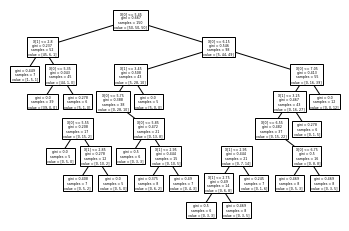

In [10]:
clf = DecisionTreeClassifier(min_weight_fraction_leaf=0.03)
clf.fit(x, y)
decision_boundary_plot(x, y, clf)
plot_tree(clf)